<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: ignored

In [2]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [4]:
dataset = (dataset/255.0 - 0.5).astype(np.float16)
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
#X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.2, random_state=100)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

8 [[-0.1      -0.0804   -0.08826  ... -0.0255   -0.03726   0.02158 ]
 [-0.12354  -0.0843   -0.0843   ...  0.013725  0.0451    0.08826 ]
 [-0.1666   -0.1902   -0.1863   ... -0.01765   0.01765   0.05685 ]
 ...
 [-0.0608   -0.0647   -0.0726   ... -0.049    -0.013725 -0.03333 ]
 [-0.05685  -0.0726   -0.0726   ... -0.0608   -0.04117  -0.0726  ]
 [-0.09216  -0.10394  -0.09607  ... -0.0647   -0.03726  -0.0608  ]]


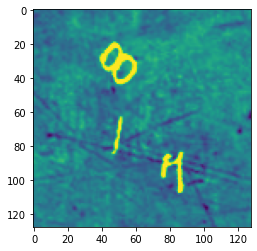

In [5]:
i = np.random.randint(0, X_train.shape[0])
sample = X_train[i]
print(Y_train[i], sample)
plt.imshow(sample.astype(np.float32))

[[ 0.3235    0.249     0.1824    0.1824    0.1274    0.1353    0.151
   0.1274    0.04117  -0.1627   -0.10785   0.1549    0.1471    0.1471
   0.1432    0.1549   -0.2373   -0.3313    0.12354   0.0098   -0.09216
  -0.04117   0.2451    0.2019    0.2255    0.12354   0.049     0.1274
   0.0765   -0.05295  -0.0647    0.0451    0.2803    0.339     0.1392  ]
 [ 0.05295   0.2646   -0.0686   -0.0098    0.198     0.2451    0.1785
   0.12354   0.0804    0.02158  -0.1549    0.1392    0.2177    0.1863
   0.1313    0.1627   -0.12354  -0.5      -0.11566  -0.0843   -0.09607
   0.02942   0.11176   0.11176   0.3823    0.5       0.5       0.5
   0.3352    0.04117   0.02158   0.2844    0.3667    0.2725    0.3196  ]
 [-0.3157    0.11566  -0.2294   -0.2725    0.0686    0.2412    0.1785
   0.0726    0.1432    0.2177   -0.1588    0.1824    0.2216    0.1274
   0.1353    0.0608   -0.02158   0.02158   0.1785    0.2412    0.0804
   0.2098    0.3472    0.4294    0.5       0.5       0.5       0.5
   0.5       0.2216

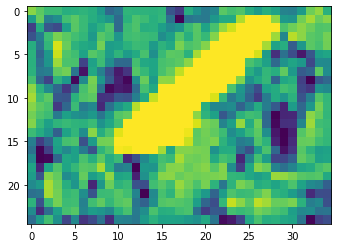

In [8]:
display = sample[10:35, 30:65]
plt.imshow(display.astype(np.float32))
print(display)

(40000, 128, 128, 1, 1) (10000, 128, 128, 1, 1)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

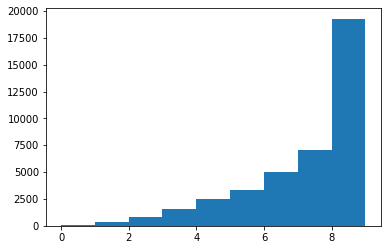

In [8]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

#b = np.zeros((Y_train.size, Y_train.max()+1))
#b[np.arange(Y_train.size),Y_train] = 1
#Y_train = b

#b = np.zeros((Y_test.size, Y_test.max()+1))
#b[np.arange(Y_test.size),Y_test] = 1
#Y_test = b

# ***Keras Solution***

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [17]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0):
  my_model = Sequential()
  #my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  #my_model.add(Conv2D(conv2d_2, kernel_size=(3,3), activation='relu'))
  #my_model.add(MaxPool2D(pool_size=(2,2)))
  #my_model.add(Dropout(dr))
  #my_model.add(BatchNormalization())
  #my_model.add(Flatten())
  #my_model.add(Dropout(dr))
  #my_model.add(BatchNormalization())
  #my_model.add(Dense(dense_node, activation='relu'))
  #my_model.add(Dropout(dr))
  #my_model.add(Dense(3, activation='relu'))
  #my_model.add(Dense(len(number_of_label[0]), activation='relu'))

  my_model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  my_model.add(Dense(128*128, activation='relu'))
  my_model.add(Dense(len(number_of_label[0]), activation='relu'))
  my_model.add(Dense(1, activation='relu'))

  optimizerAdam = Adam(lr=0.0001, amsgrad=True)
  optimizerSGD = SGD(learning_rate=0.005, momentum=0.001, nesterov=False)
  
  #my_model.compile(loss='categorical_crossentropy',
  #              optimizer=optimizerSGD,
  #              metrics=['accuracy'])

  my_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizerSGD,
                metrics=['accuracy'])
  
  return my_model

In [19]:
BATCH = 256
my_model = create_model(conv2d_1=128, str_1=2, conv2d_2=64, str_2=1, dense_node=64, dr=0.0)
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 16384)             268451840 
_________________________________________________________________
dense_4 (Dense)              (None, 10)                163850    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 268,615,701
Trainable params: 268,615,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  X_train, Y_train,
  epochs=300, validation_split = 0.2, verbose=1,
  batch_size = BATCH, shuffle=True,
  callbacks=[early_stop, checkpoint])

Epoch 1/300
125/125 [==============================] - ETA: 0s - loss: nan - accuracy: 7.1875e-04
Epoch 00001: val_accuracy improved from -inf to 0.00075, saving model to weight_model_cnn_best.h5
125/125 [==============================] - 36s 288ms/step - loss: nan - accuracy: 7.1875e-04 - val_loss: nan - val_accuracy: 7.5000e-04
Epoch 2/300
125/125 [==============================] - ETA: 0s - loss: nan - accuracy: 7.1875e-04
Epoch 00002: val_accuracy did not improve from 0.00075
125/125 [==============================] - 8s 61ms/step - loss: nan - accuracy: 7.1875e-04 - val_loss: nan - val_accuracy: 7.5000e-04
Epoch 3/300
125/125 [==============================] - ETA: 0s - loss: nan - accuracy: 7.1875e-04
Epoch 00003: val_accuracy did not improve from 0.00075
125/125 [==============================] - 8s 61ms/step - loss: nan - accuracy: 7.1875e-04 - val_loss: nan - val_accuracy: 7.5000e-04
Epoch 4/300
125/125 [==============================] - ETA: 0s - loss: nan - accuracy: 7.1875e

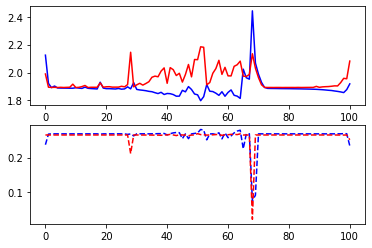

In [31]:
plt.subplot(211)
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

plt.subplot(212)
plt.plot(history.history['accuracy'], '--b')
plt.plot(history.history['val_accuracy'], '--r')